In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras import datasets, layers, models 
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

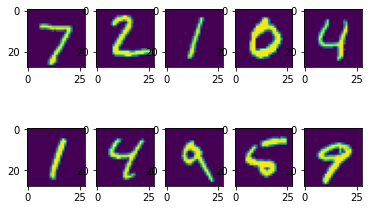

In [5]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])

In [6]:
#reshape images to greyscale single channel
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
#convert data to float32 for 32-bit precision and scale data by maximum byte value 255
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
#apply one-hot encoding to the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = models.Sequential()

First convolution layer to extract feature maps

In [10]:
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=[28,28,1])) #using standard number of filters 32 for optimal performance the kernel size is 3x3 
#stating input image size to prevent border effect

Pooling to downsample feature maps

In [11]:
model.add(layers.MaxPool2D(pool_size=2,strides=2)) #pooling matrix is of size 2x2 and shift the frame every 2 pixels so setting sosetting the stride as 2  

In [12]:
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=[28,28,1])) #relu used to prevent taking up excessive computational resources for the CNN 
model.add(layers.MaxPool2D(pool_size=2,strides=2))

Flattening

In [13]:
model.add(layers.Flatten())

In [14]:
model.add(layers.Dense(64,activation ='relu'))
model.add(layers.Dense(10,activation='softmax')) #output layer has 10 possibilites for number classes from 0 to 9 also softmax is used  since multinomial classification 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #using categorical losss entropy as labels are one-hot encoded 
#optimizer is adam 

In [17]:
model.fit(X_train,y_train,epochs=5,batch_size= 32) #epoch is chosen as 5 because there is no significant change in accuracy after that accuracy remains at 99 percent
#batch size is 32 as it will converge faster although training will be slower

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1570 - accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0517 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0284 - accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0214 - accuracy: 0.9931


Evaluate model accuracy to see if any hyperparameters need tuning

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0379 - accuracy: 0.9888


[0.0379270575940609, 0.9887999892234802]